In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
df = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.isnull().sum().sum()

0

In [5]:
test.isnull().sum().sum()

0

In [6]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [9]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [10]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 9.0 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=1b8a2ffcbc364fe1530825a5d24d045359b6d5123ccf62a46059f772762aeac2
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0990607 to fit



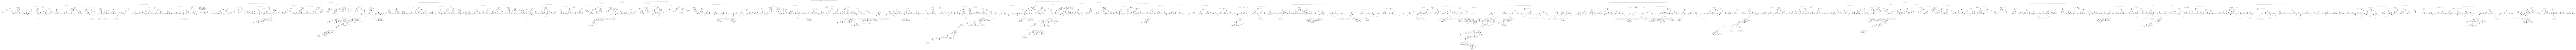

In [12]:
X = df.drop(columns='label')
y = df['label']


from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X,y)

from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus



features = X.columns
dot_data = export_graphviz(dt,out_file=None,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

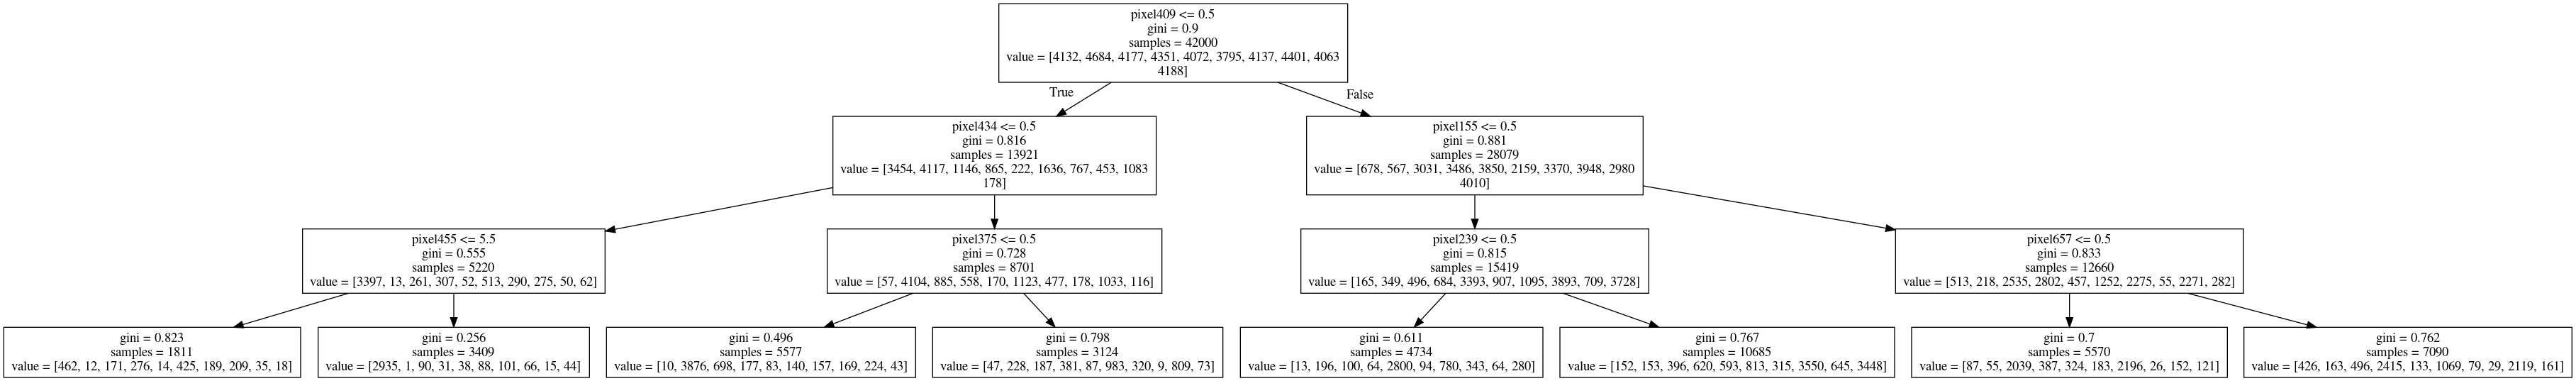

In [13]:
dt = DecisionTreeClassifier(max_depth=3,min_samples_leaf=11)
dt.fit(X,y)
features = X.columns
dot_data = export_graphviz(dt,out_file=None,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [14]:
test1 = test
y_pred = dt.predict(test1)
y_prob = dt.predict_proba(test1)
y_pred_train = dt.predict(X)
y_prob_train = dt.predict_proba(X)

In [15]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

In [16]:
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

Accuracy of Decision Tree on Train 0.45754761904761904
F1 score on train 38.067227488796576


# ##Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10,random_state=1)



In [18]:
rfc.fit(X,y)

RandomForestClassifier(n_estimators=10, random_state=1)

In [19]:
test1 = test
y_pred = rfc.predict(test1)
y_prob = rfc.predict_proba(test1)
y_pred_train = rfc.predict(X)
y_prob_train = rfc.predict_proba(X)

In [20]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

In [21]:
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

Accuracy of Decision Tree on Train 0.9991190476190476
F1 score on train 99.91189165981373


In [22]:
samp = pd.read_csv('../input/digit-recognizer/sample_submission.csv')

In [23]:
samp.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [24]:
test.shape

(28000, 784)

In [25]:
data = pd.DataFrame(y_pred,index=samp['ImageId']).rename(columns={0:'Label'})
data = data.reset_index().rename(columns={'index':'ImageId'})
data = data.set_index('ImageId')
data.head()

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3


In [26]:
data.shape

(28000, 1)

In [27]:
data.to_csv('submission2.csv')

# Hyper parameter tuning of Random Forest

In [28]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV


rfc= RandomForestClassifier(random_state=1)

params = {'n_estimators':sp_randint(5,25),'criterion':['gini','entropy'],
    'max_depth':sp_randint(2,10),
    'min_samples_split':sp_randint(2,20),
    'min_samples_leaf':sp_randint(1,20),'max_features':sp_randint(2,10)}

rand_search_rfc = RandomizedSearchCV(rfc,param_distributions=params,cv=3,random_state=1)

rand_search_rfc.fit(X,y)

print(rand_search_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 23}


In [29]:
from sklearn.model_selection import train_test_split

rfc = RandomForestClassifier(**rand_search_rfc.best_params_)

rfc.fit(X,y)

test1 = test
y_pred = rfc.predict(test1)
y_prob = rfc.predict_proba(test1)
y_pred_train = rfc.predict(X)
y_prob_train = rfc.predict_proba(X)

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

Accuracy of Decision Tree on Train 0.8848095238095238
F1 score on train 88.37404959181595


In [30]:
data = pd.DataFrame(y_pred,index=samp['ImageId']).rename(columns={0:'Label'})
data = data.reset_index().rename(columns={'index':'ImageId'})
data = data.set_index('ImageId')
data.head()

data.to_csv('submission3.csv')

In [31]:
##LGBM:

Accuracy of Decision Tree on Train 0.9995952380952381
F1 score on train 99.95952433983162


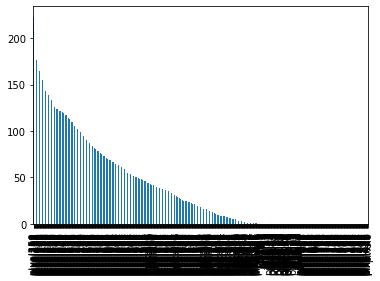

In [32]:
import lightgbm as lgb
lgbc = lgb.LGBMClassifier()

lgbc.fit(X,y)

test1 = test
y_pred = lgbc.predict(test1)
y_prob = lgbc.predict_proba(test1)
y_pred_train = lgbc.predict(X)
y_prob_train = lgbc.predict_proba(X)

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

cols = X.columns
lgbc.feature_importances_

fi = pd.DataFrame(index=cols,data=lgbc.feature_importances_,columns=['Importance'])
fi

#Feature importance is available for bagging and boosting both

fi['Importance'].sort_values(ascending=False).plot.bar()

In [33]:
data = pd.DataFrame(y_pred,index=samp['ImageId']).rename(columns={0:'Label'})
data = data.reset_index().rename(columns={'index':'ImageId'})
data = data.set_index('ImageId')
data.head()

data.to_csv('submission7.csv')

{'max_depth': 11, 'min_child_samples': 18, 'n_estimators': 227, 'num_leaves': 37}
Accuracy of Decision Tree on Train 1.0
F1 score on train 100.0


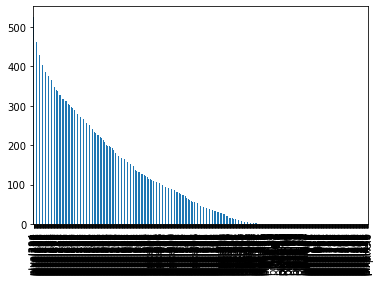

In [34]:
#hyperparameter tuning of LGBM

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

lgbc= lgb.LGBMClassifier(random_state=1)

params = {'n_estimators':sp_randint(5,250),
    'max_depth':sp_randint(2,20),
    'min_child_samples':sp_randint(1,20),'num_leaves':sp_randint(5,50)}

rand_search_lgbc = RandomizedSearchCV(lgbc,param_distributions=params,cv=3,random_state=1)

rand_search_lgbc.fit(X,y)

print(rand_search_lgbc.best_params_)



lgbc= lgb.LGBMClassifier(**rand_search_lgbc.best_params_,random_state=1)

lgbc.fit(X,y)

test1 = test
y_pred = lgbc.predict(test1)
y_prob = lgbc.predict_proba(test1)
y_pred_train = lgbc.predict(X)
y_prob_train = lgbc.predict_proba(X)

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

cols = X.columns
lgbc.feature_importances_

fi = pd.DataFrame(index=cols,data=lgbc.feature_importances_,columns=['Importance'])
fi

#Feature importance is available for bagging and boosting both

fi['Importance'].sort_values(ascending=False).plot.bar()

In [35]:
data = pd.DataFrame(y_pred,index=samp['ImageId']).rename(columns={0:'Label'})
data = data.reset_index().rename(columns={'index':'ImageId'})
data = data.set_index('ImageId')
data.head()
data.to_csv('submission8.csv')

In [36]:
##Support Vector Machines

In [37]:
# Stacking algorithms

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
dt = DecisionTreeClassifier()
lgbc= lgb.LGBMClassifier(**rand_search_lgbc.best_params_)
rfc = RandomForestClassifier(**rand_search_rfc.best_params_)


clf = VotingClassifier(estimators=[('dt',dt),('lgbc',lgbc),('rfc',rfc),('lr',lr)],voting='soft')
clf.fit(X,y)


test1 = test
y_pred = clf.predict(test1)
y_prob = clf.predict_proba(test1)
y_pred_train = clf.predict(X)
y_prob_train = clf.predict_proba(X)

from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score

print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y))
print('F1 score on train',f1_score(y,y_pred_train,average='weighted')*100)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of Decision Tree on Train 1.0
F1 score on train 100.0


In [38]:
data = pd.DataFrame(y_pred,index=samp['ImageId']).rename(columns={0:'Label'})
data = data.reset_index().rename(columns={'index':'ImageId'})
data = data.set_index('ImageId')
data.head()
data.to_csv('submission11.csv')